In [73]:
import numpy as np 
import matplotlib.pyplot as plt


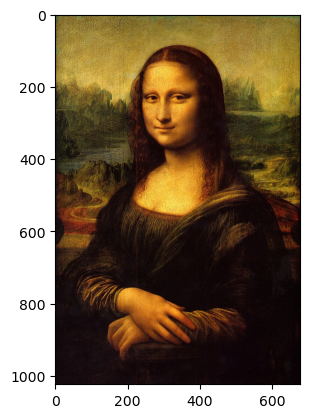

In [74]:
img = plt.imread( fname='Mona_Lisa.jpg' )
flattened = img.flatten()
plt.imshow(img)


In [75]:
def shiftt(img , shift):
    shifted_img = np.zeros(shape = img.shape , dtype=int) 
    if shift > 0:        
        shifted_img[:, shift:, :] = img[:, :img.shape[1]-shift, :]
    elif shift < 0:
        shifted_img[:, :img.shape[1]+shift, :] = img[:, -shift:, :]
    else:
        shifted_img = img.copy()
    return shifted_img

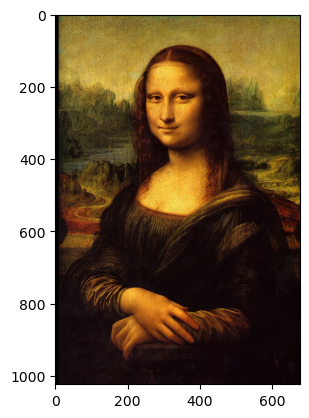

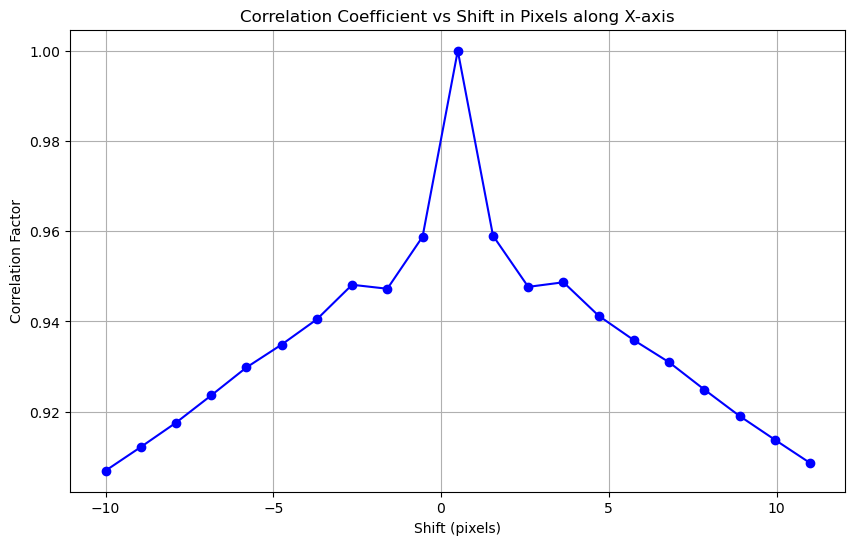

In [76]:
correlation_coefficient = []

for shift in range (-10 , 11 ):
    img_new = shiftt( img=img , shift=shift)
    flattened_shifted = img_new.flatten()

    correlation_coefficient.append(np.corrcoef(flattened_shifted,y=flattened)[0,1])
plt.imshow(img_new)
# plt.title("example with 10 pixel shift")
plt.savefig("shif.jpg")
x_values = np.linspace(start=-10, stop=11, num=21)

plt.figure(figsize=(10, 6))
plt.xlabel("Shift (pixels)")
plt.ylabel("Correlation Factor")
plt.title("Correlation Coefficient vs Shift in Pixels along X-axis")
plt.grid()
plt.plot(x_values, correlation_coefficient , marker='o', linestyle='-', color='b' ,)
plt.savefig("g1.jpg")

In [77]:
#drawing histogram of colour intensities
def histogram_generate(img_red , img_blue , img_green ):
    hist_red = np.zeros(shape=256, dtype=int)
    hist_blue = np.zeros(shape=256, dtype=int)
    hist_green = np.zeros(shape=256, dtype=int)

    for intensity in img_red:
        hist_red[intensity] += 1 
    for intensity in img_blue:
        hist_blue[intensity] += 1 
    for intensity in img_green:
        hist_green[intensity] += 1 

    plt.figure(figsize=(10, 6))
    plt.bar(list(range(0,256)), height=hist_red, width=1 ,alpha = 0.7 , color = "red"  , label='Red Channel')
    plt.bar(list(range(0,256)), height=hist_blue, width=1 ,alpha = 0.7 , color = "blue"  , label='Blue Channel' )
    plt.bar(list(range(0,256)), height=hist_green, width=1 ,alpha = 0.7 , color = "green" ,label='Green Channel')
    plt.legend()
    plt.title("Color channel intensities for the image")
    plt.xlabel('Intensity')
    plt.ylabel(ylabel=f"Number of pixels of the given intensity")
    plt.savefig("g2.jpg")
    plt.show()


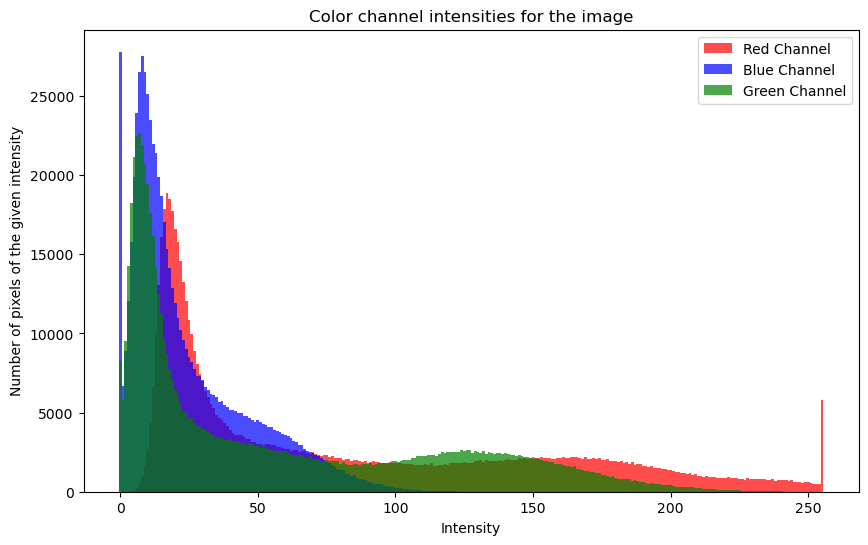

In [78]:
#for generating histogram of individual colours R , G , B 
array_red = img[: ,: , 0].flatten()
array_green = img[: ,: , 1].flatten()
array_blue = img[: ,: , 2].flatten()

histogram_generate(array_red ,array_blue , array_green )


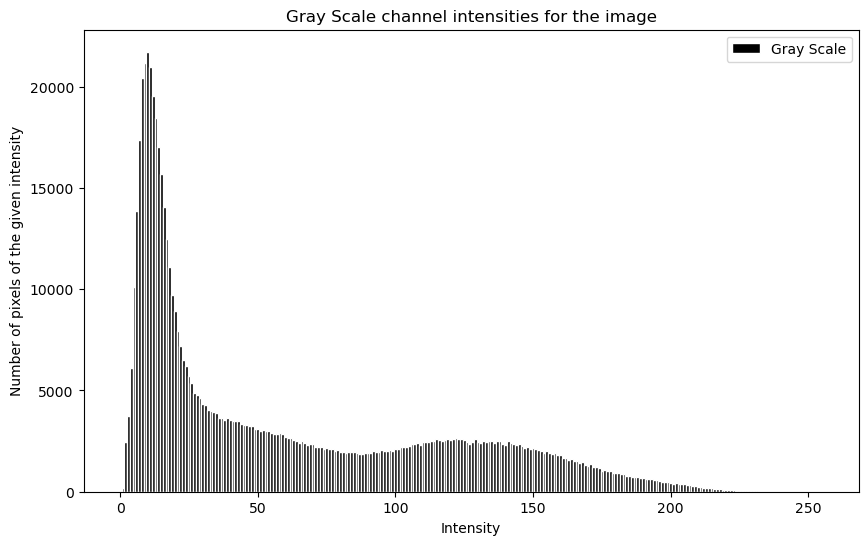

In [99]:
#for generating histogram of individual colours of the gray scale image
gray_scale = (img[ : , : , 0]*0.2989 + img[ : , : , 1]*0.5870 + img[ : , : , 2]*0.1140).flatten()
hist_gray_scale = np.zeros(shape=256, dtype=int)
for intensity in gray_scale:
        hist_gray_scale[int(intensity)] += 1 

plt.figure(figsize=(10, 6))
plt.bar(list(range(0,256)), height=hist_gray_scale, width=1 , color = "black"  , label='Gray Scale' , edgecolor = "white")
plt.xlabel('Intensity')
plt.ylabel(ylabel=f"Number of pixels of the given intensity")
plt.legend()
plt.title("Gray Scale channel intensities for the image")
plt.savefig("g3.jpg")
plt.show()

